# Image Classification with Neural Networks

In [1]:
# You are required to build and evaluate a deep learning model to classify handwritten digits using the .

# Download and load the MNIST dataset.
# Display sample images and analyze class distribution.
# Normalize the pixel values.
# One-hot encode the labels.
# Split the data into training, validation, and test sets.
# Construct a CNN model using any deep learning framework .
# Experiment with different architectures and hyperparameters.
# Use appropriate activation functions, loss functions, and optimizers.
# Train your model using the training set.
# Plot training and validation accuracy/loss over epochs.
# Evaluate performance on the test set.
# Include model summary, performance metrics (accuracy, confusion matrix), and learning curves.
# Briefly explain any challenges faced and how you addressed them.

### 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

### 2. Loading & Splitting Data Set

In [3]:
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
fmnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [5]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [6]:
print(training_images.shape)
print(test_images.shape)
print(training_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### 3. Displaying Labels

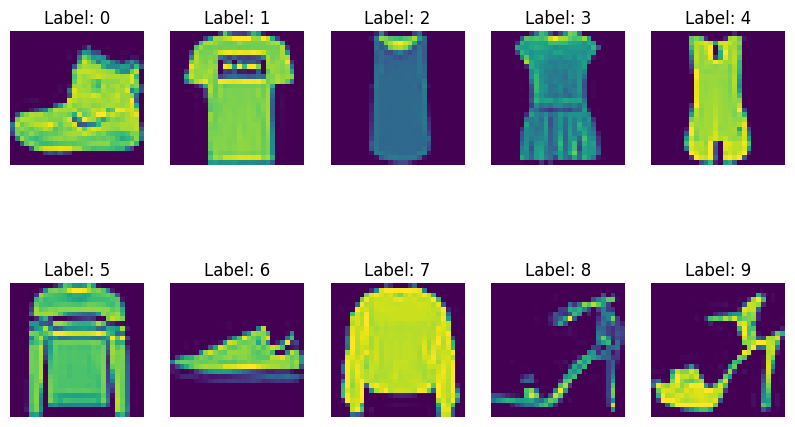

In [7]:
plt.figure(figsize=(10,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(training_images[i])
  plt.title(f'Label: {i}')
  plt.axis('off')
plt.show()

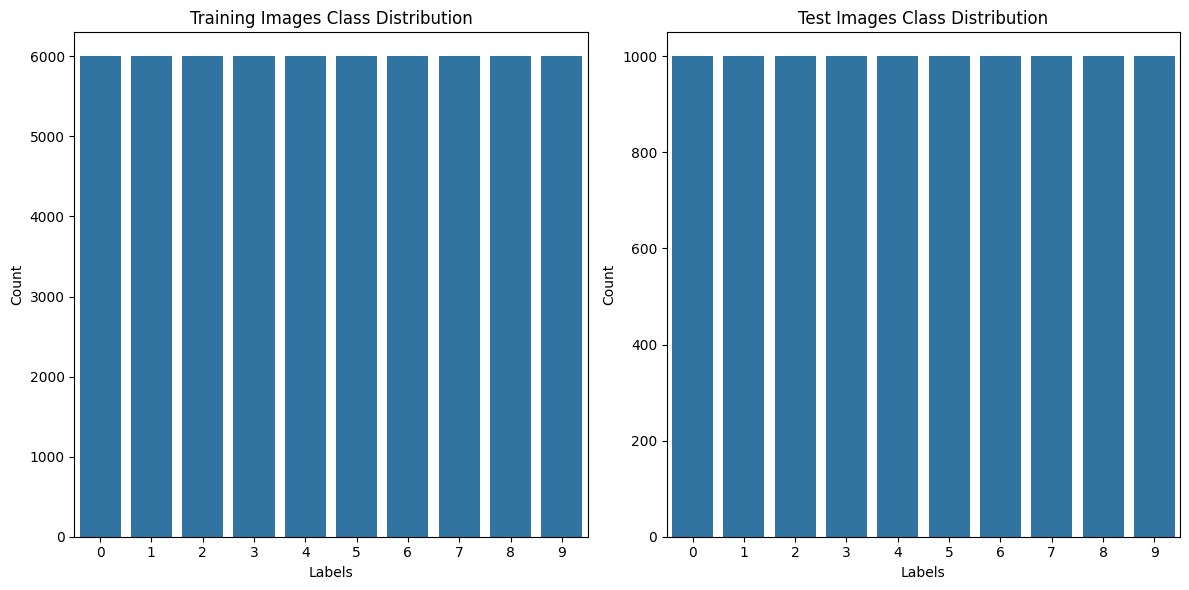

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=training_labels)
plt.title('Training Images Class Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=test_labels)
plt.title('Test Images Class Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### 4. Normalizing Pixel Values

In [9]:
training_images = training_images / 255.0
test_images = test_images / 255.0

### 5. One Hot Encoding Of Labels

In [10]:
from tensorflow.keras.utils import to_categorical

training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


### 6. Split the data into training, validation, and test sets.

In [11]:
from sklearn.model_selection import train_test_split


training_images, validation_images, training_labels, validation_labels = train_test_split(
    training_images, training_labels, test_size=0.2, random_state=42
)

print("Training images shape:", training_images.shape)
print("Validation images shape:", validation_images.shape)
print("Training labels shape:", training_labels.shape)
print("Validation labels shape:", validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (48000, 28, 28)
Validation images shape: (12000, 28, 28)
Training labels shape: (48000, 10)
Validation labels shape: (12000, 10)
Test images shape: (10000, 28, 28)
Test labels shape: (10000, 10)


### 7. Construct a CNN model using any deep learning framework .

In [12]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

### 8. Train The Model

In [13]:
early_stopping = EarlyStopping(patience=5)
history = model.fit(
    training_images, training_labels, epochs=20, validation_data=(
        validation_images, validation_labels), verbose=1, callbacks=[early_stopping])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7409 - loss: 0.7222 - val_accuracy: 0.8677 - val_loss: 0.3781
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.8743 - loss: 0.3538 - val_accuracy: 0.8754 - val_loss: 0.3426
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.8887 - loss: 0.3138 - val_accuracy: 0.8836 - val_loss: 0.3301
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.8974 - loss: 0.2844 - val_accuracy: 0.8925 - val_loss: 0.2997
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9073 - loss: 0.2578 - val_accuracy: 0.8982 - val_loss: 0.2815
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9138 - loss: 0.2353 - val_accuracy: 0.8918 - val_loss: 0.3011
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9196 - loss: 0.2204 - val_accuracy: 0.9060 - val_loss: 0.2652
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9244 -

### 9. Plot Training and Validation Accuracy/Loss

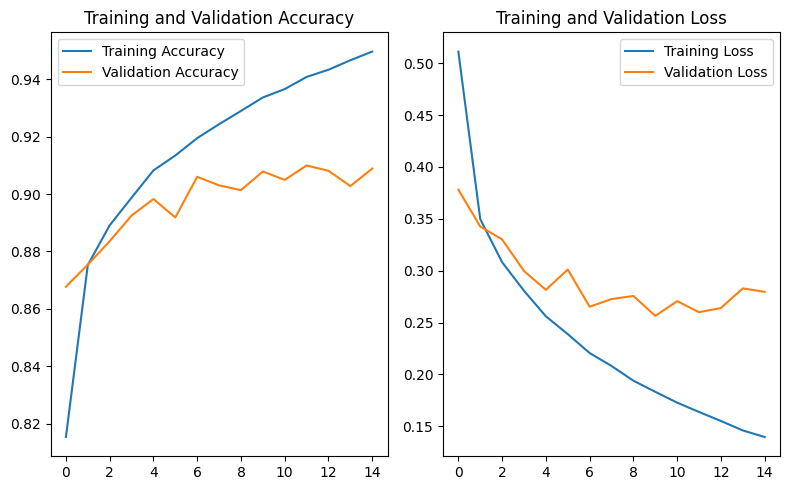

In [20]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

#### From the above plots, it is clearly indicated that model is overfitting as the gap is increasing over time.

### 10. Evaluate performance on Test Set

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 3s - 10ms/step - accuracy: 0.9029 - loss: 0.3044

Test accuracy: 0.902899980545044


### 11. Include model summary, performance metrics (accuracy, confusion matrix), and learning curves.

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


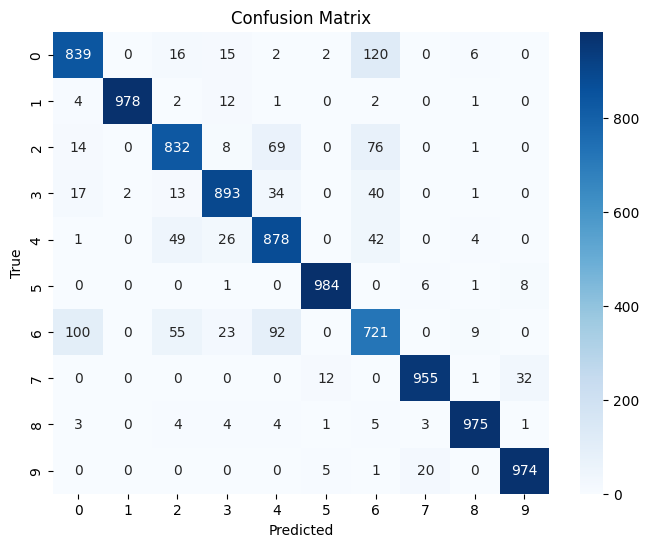

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.83      0.84      1000
           3       0.91      0.89      0.90      1000
           4       0.81      0.88      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.72      0.72      1000
           7       0.97      0.95      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [24]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred_classes))

#### Overfitting: Initially observed a gap between training and validation accuracy.
#### Used train_test_split to ensure a validation set was available for early stopping or monitoring.